# Project: Investigate a Dataset

###  Dataset analyzed:
    Titanic Data 

### Questions posed:
    What factors made people more likely to survive?
        1. What's the survive rate if grouped by Pclass, Sex, Age, SibSp, Parch, Embarked?
        2. How does survive rate various among different Age Groups?
            1) For female, how does survive rate change when passenger ages change?
            2) For male, how does survive rate change when passenger ages change?

### What I did to investigate those questions:
    First, I took a look at this dataset using .head()
    Second, I described the dataset after group data by different factors
    Third, I removed records where age has a missing value 'NaN' and defined a function to format Ages so that Ages are divided into 17 Groups.
    Then, I calculated mean value of 'Surived' and compared among Age Groups and Sex.
    Last, I made a plot to visualize the difference.
    
### Documentation of any data wrangling you did:
    After checking the data set and considering the factor, Age, I want to focus on, 
    1. Records with missing data for Age in this data are deleted (age_titanic_df)
    2. Age are gouped into 17 Age Groups with a defined function (Age_Format)

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

filename = '/Users/qinliu/Documents/OneDrive/udc/L3PInvest/titanic_data.csv'
titanic_df = pd.read_csv(filename, index_col = 'PassengerId')

In [70]:
# have a look at the first 5 lines of this data
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### How is Survived Related to other Factors ?

    Before we start to analysis any specific factor, we just run the .describe() to have a look at how survived
    is related to other 6 factors:
    
    1. Pclass
    2. Sex
    3. Age
    4. SibSp
    5. Parch
    6. Embarked



In [71]:
# have a look at basic statistics of Pclass and Survived after grouping it by Pclass
titanic_df[['Pclass', 'Survived']].groupby('Pclass', as_index=True).describe()

Survived                                             
          count      mean       std  min  25%  50%  75%  max
Pclass                                                      
1         216.0  0.629630  0.484026  0.0  0.0  1.0  1.0  1.0
2         184.0  0.472826  0.500623  0.0  0.0  0.0  1.0  1.0
3         491.0  0.242363  0.428949  0.0  0.0  0.0  0.0  1.0

In [72]:
# have a look at basic statistics of Sex and Survived after grouping it by Sex
titanic_df[['Sex', 'Survived']].groupby('Sex', as_index=True).describe()

Survived                                             
          count      mean       std  min  25%  50%  75%  max
Sex                                                         
female    314.0  0.742038  0.438211  0.0  0.0  1.0  1.0  1.0
male      577.0  0.188908  0.391775  0.0  0.0  0.0  0.0  1.0

In [73]:
# have a look at basic statistics of Age and Survived after grouping it by Survived
titanic_df[['Age', 'Survived']].groupby('Survived', as_index=True).describe()

Age                                                    
          count       mean        std   min   25%   50%   75%   max
Survived                                                           
0         424.0  30.626179  14.172110  1.00  21.0  28.0  39.0  74.0
1         290.0  28.343690  14.950952  0.42  19.0  28.0  36.0  80.0

In [74]:
# have a look at basic statistics of SibSp and Survived after grouping it by Survived
titanic_df[['SibSp', 'Survived']].groupby('Survived', as_index=True).describe()

SibSp                                             
          count      mean       std  min  25%  50%  75%  max
Survived                                                    
0         549.0  0.553734  1.288399  0.0  0.0  0.0  1.0  8.0
1         342.0  0.473684  0.708688  0.0  0.0  0.0  1.0  4.0

In [75]:
# have a look at basic statistics of Parch and Survived after grouping it by Survived
titanic_df[['Parch', 'Survived']].groupby('Survived', as_index=True).describe()

Parch                                             
          count      mean       std  min  25%  50%  75%  max
Survived                                                    
0         549.0  0.329690  0.823166  0.0  0.0  0.0  0.0  6.0
1         342.0  0.464912  0.771712  0.0  0.0  0.0  1.0  5.0

In [76]:
# have a look at basic statistics of Embarked and Survived after grouping it by Embarked
titanic_df[['Embarked', 'Survived']].groupby('Embarked', as_index=True).describe()

Survived                                             
            count      mean       std  min  25%  50%  75%  max
Embarked                                                      
C           168.0  0.553571  0.498608  0.0  0.0  1.0  1.0  1.0
Q            77.0  0.389610  0.490860  0.0  0.0  0.0  1.0  1.0
S           644.0  0.336957  0.473037  0.0  0.0  0.0  1.0  1.0

#### Summary:

    From above statistics, we could see that mean of Survived varies among different Pclass, between male and female, and among different Embarked. 

    And for passengers who survived, their mean age, mean SibSp and mean Parch are different from that of who didn't survived.

    Here, we will pick Age and Sex to do the analysis first.

#### How does age influence survived?

    First we will check the values of Age in titanic_df to see whether there is any missing values or invalid (non-numeric) values.
    
    If there is any, we will delete them and do analysis with the remained data.
    
    Then we will format age into age groups so that passengers with similar age could be considered the same and which also make analysis more reasonable.
    
    Also, we will do merge and join to get a new dataset contains all the information we need to do further analysis and plots.

In [77]:
# count non missing records for Age in titanic_df to see whether there is missing data for this factor
titanic_df['Age'].count()

714

In [78]:
# subset titanic_df to get records all have a valid numeric age value
age_titanic_df = titanic_df[titanic_df['Age'] > 0]

In [79]:
age_titanic_df['Parch'].count()

714

In [80]:
# get basic information about Age in titanic_df, get min and max to prepare for grouping ages into age groups
titanic_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [81]:
'''
To better look into the relationship between survive rate and age,
a function is created here, and from the describe of age in previous steps,
min age is 0.42 and max age is 80
based on this information, the function will group age into 17 groups
'''
def Age_Fotmat(age):
    if (0 <= age) & (age < 1):
        return '00-'
    elif (1 <= age) & (age <5 ):
        return '01-04'
    elif (5 <= age) & (age <10 ):
        return '05-09'
    elif (10 <= age) & (age <15 ):
        return '10-14'
    elif (15 <= age) & (age <20 ):
        return '15-19'
    elif (20 <= age) & (age <25 ):
        return '20-24'
    elif (25 <= age) & (age <30 ):
        return '25-29'
    elif (30 <= age) & (age <35 ):
        return '30-34'
    elif (35 <= age) & (age <40 ):
        return '35-39'
    elif (40 <= age) & (age <45 ):
        return '40-44'
    elif (45 <= age) & (age <50 ):
        return '45-49'
    elif (50 <= age) & (age <55 ):
        return '50-54'
    elif (55 <= age) & (age <60 ):
        return '55-59'
    elif (60 <= age) & (age <65 ):
        return '60-64'
    elif (65 <= age) & (age <70 ):
        return '65-69'
    elif (70 <= age) & (age <75 ):
        return '70-74'
    else:
        return '75+'

In [82]:
# apply function to attibute Age
age_grouped = pd.DataFrame(age_titanic_df['Age'].apply(Age_Fotmat))
age_grouped.head()

,Age
PassengerId,
1,20-24
2,35-39
3,25-29
4,35-39
5,35-39


In [83]:
age_titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [84]:
# merge data to get a dataframe having both Age and Age_Group
# and assign the merged data to a new variant age_joined
age_joined = pd.merge(age_titanic_df[['Survived', 'Age']], age_grouped, 
                      left_index = True, right_index = True,
                      suffixes=('', '_Groups'))

In [85]:
age_joined.head()

,Survived,Age,Age_Groups
PassengerId,,,
1,0,22.0,20-24
2,1,38.0,35-39
3,1,26.0,25-29
4,1,35.0,35-39
5,0,35.0,35-39


In [86]:
age_survived_count = age_joined[['Age_Groups', 'Survived']].groupby('Age_Groups').count()

In [87]:
age_survived_mean = age_joined[['Age_Groups', 'Survived']].groupby('Age_Groups').mean()

In [88]:
age_survived_count

,Survived
Age_Groups,
00-,7
01-04,33
05-09,22
10-14,16
15-19,86
20-24,114
25-29,106
30-34,95
35-39,72


In [89]:
age_survived_mean

,Survived
Age_Groups,
00-,1.000000
01-04,0.606061
05-09,0.500000
10-14,0.437500
15-19,0.395349
20-24,0.342105
25-29,0.358491
30-34,0.421053
35-39,0.458333


In [90]:
# merge count and mean to get a dataframe having both values for each Age_Group
# and assign the merged data to a new variant age_survived_describe
# which will be used to make plots
age_survived_describe = pd.merge(age_survived_count, age_survived_mean, 
                                 left_index = True, right_index = True,
                                 suffixes=('_Count', '_Mean'))

In [91]:
age_survived_describe

,Survived_Count,Survived_Mean
Age_Groups,,
00-,7,1.000000
01-04,33,0.606061
05-09,22,0.500000
10-14,16,0.437500
15-19,86,0.395349
20-24,114,0.342105
25-29,106,0.358491
30-34,95,0.421053
35-39,72,0.458333


Populating the interactive namespace from numpy and matplotlib


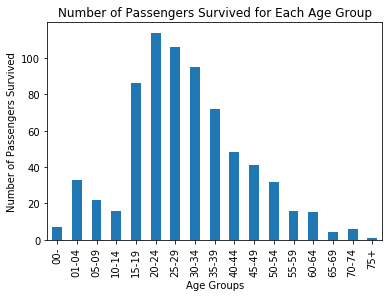

In [92]:
%pylab inline
age_survived_plots = age_survived_describe['Survived_Count'].plot(
    kind='bar',
    title = 'Number of Passengers Survived for Each Age Group'
    )

plt.xlabel('Age Groups')
plt.ylabel('Number of Passengers Survived')

Populating the interactive namespace from numpy and matplotlib


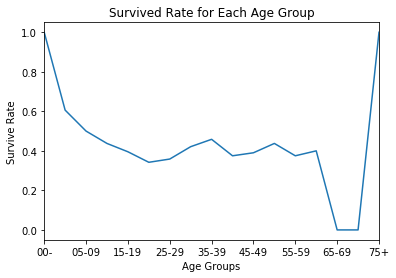

In [93]:
%pylab inline
age_survived_plots = age_survived_describe['Survived_Mean'].plot(    
    kind='line',
    title = 'Survived Rate for Each Age Group'
    )

plt.xlabel('Age Groups')
plt.ylabel('Survive Rate')

#### Does sex has an influence on the Survived Rate for Each Age Group?

    From above analysis, we could see that the Survived Rate varies for different Age Groups. However, there are still many factors have an effect on Age Group. For example, sex. 
    
    Do both of female and male have the same survived rate for each age group? 

In [94]:
# merge to get a dataframe having both values Survived, Age, Sex, and Age_Groups for PassengerId
# and assign the merged data to a new variant age_sex
age_sex = pd.merge(age_titanic_df[['Survived', 'Age','Sex']], age_grouped, 
                      left_index = True, right_index = True,
                      suffixes=('', '_Groups'))

In [95]:
age_sex.head()

,Survived,Age,Sex,Age_Groups
PassengerId,,,,
1,0,22.0,male,20-24
2,1,38.0,female,35-39
3,1,26.0,female,25-29
4,1,35.0,female,35-39
5,0,35.0,male,35-39


In [96]:
age_sex_count = age_sex.groupby(['Age_Groups', 'Sex']).count()

In [97]:
age_sex_count

Survived  Age
Age_Groups Sex                  
00-        female         2    2
           male           5    5
01-04      female        15   15
           male          18   18
05-09      female        13   13
           male           9    9
10-14      female         9    9
           male           7    7
15-19      female        36   36
           male          50   50
20-24      female        42   42
           male          72   72
25-29      female        30   30
           male          76   76
30-34      female        33   33
           male          62   62
35-39      female        27   27
           male          45   45
40-44      female        18   18
           male          30   30
45-49      female        14   14
           male          27   27
50-54      female        12   12
           male          20   20
55-59      female         6    6
           male          10   10
60-64      female         4    4
           male          11   11
65-69      male           4    4
70-74      male           6    6
75+        male           1    1

In [98]:
age_sex_mean = age_sex.groupby(['Age_Groups', 'Sex']).mean()

In [99]:
age_sex_mean

Survived        Age
Age_Groups Sex                        
00-        female  1.000000   0.750000
           male    1.000000   0.734000
01-04      female  0.666667   2.666667
           male    0.555556   2.500000
05-09      female  0.538462   7.000000
           male    0.444444   8.000000
10-14      female  0.555556  13.055556
           male    0.285714  11.857143
15-19      female  0.805556  17.361111
           male    0.100000  17.720000
20-24      female  0.761905  22.619048
           male    0.097222  21.965278
25-29      female  0.666667  27.200000
           male    0.236842  26.973684
30-34      female  0.818182  31.515152
           male    0.209677  31.911290
35-39      female  0.851852  36.777778
           male    0.222222  36.700000
40-44      female  0.722222  41.555556
           male    0.166667  41.866667
45-49      female  0.642857  46.714286
           male    0.259259  46.814815
50-54      female  0.916667  51.666667
           male    0.150000  51.700000
55-59      female  0.833333  57.000000
           male    0.100000  56.950000
60-64      female  1.000000  62.000000
           male    0.181818  61.545455
65-69      male    0.000000  65.250000
70-74      male    0.000000  71.083333
75+        male    1.000000  80.000000

In [100]:
# subset age_sex to get records for male only
age_male = age_sex[age_sex['Sex'] == 'male']
age_male.head()

,Survived,Age,Sex,Age_Groups
PassengerId,,,,
1,0,22.0,male,20-24
5,0,35.0,male,35-39
7,0,54.0,male,50-54
8,0,2.0,male,01-04
13,0,20.0,male,20-24


In [101]:
# subset age_sex to get records for female only
age_female = age_sex[age_sex['Sex'] == 'female']
age_female.head()

,Survived,Age,Sex,Age_Groups
PassengerId,,,,
2,1,38.0,female,35-39
3,1,26.0,female,25-29
4,1,35.0,female,35-39
9,1,27.0,female,25-29
10,1,14.0,female,10-14


In [102]:
age_male_count = age_male.groupby(['Age_Groups']).count()
age_female_count = age_female.groupby(['Age_Groups']).count()
age_male_mean = age_male.groupby(['Age_Groups']).mean()
age_female_mean = age_female.groupby(['Age_Groups']).mean()
age_female_mean2 = age_sex.groupby(['Sex', 'Age_Groups']).mean()

In [103]:
age_male_count

,Survived,Age,Sex
Age_Groups,,,
00-,5,5,5
01-04,18,18,18
05-09,9,9,9
10-14,7,7,7
15-19,50,50,50
20-24,72,72,72
25-29,76,76,76
30-34,62,62,62
35-39,45,45,45


In [104]:
age_female_count

,Survived,Age,Sex
Age_Groups,,,
00-,2,2,2
01-04,15,15,15
05-09,13,13,13
10-14,9,9,9
15-19,36,36,36
20-24,42,42,42
25-29,30,30,30
30-34,33,33,33
35-39,27,27,27


In [105]:
age_male_mean

,Survived,Age
Age_Groups,,
00-,1.000000,0.734000
01-04,0.555556,2.500000
05-09,0.444444,8.000000
10-14,0.285714,11.857143
15-19,0.100000,17.720000
20-24,0.097222,21.965278
25-29,0.236842,26.973684
30-34,0.209677,31.911290
35-39,0.222222,36.700000


In [106]:
age_female_mean

,Survived,Age
Age_Groups,,
00-,1.000000,0.750000
01-04,0.666667,2.666667
05-09,0.538462,7.000000
10-14,0.555556,13.055556
15-19,0.805556,17.361111
20-24,0.761905,22.619048
25-29,0.666667,27.200000
30-34,0.818182,31.515152
35-39,0.851852,36.777778


In [107]:
age_female_mean2

Survived        Age
Sex    Age_Groups                     
female 00-         1.000000   0.750000
       01-04       0.666667   2.666667
       05-09       0.538462   7.000000
       10-14       0.555556  13.055556
       15-19       0.805556  17.361111
       20-24       0.761905  22.619048
       25-29       0.666667  27.200000
       30-34       0.818182  31.515152
       35-39       0.851852  36.777778
       40-44       0.722222  41.555556
       45-49       0.642857  46.714286
       50-54       0.916667  51.666667
       55-59       0.833333  57.000000
       60-64       1.000000  62.000000
male   00-         1.000000   0.734000
       01-04       0.555556   2.500000
       05-09       0.444444   8.000000
       10-14       0.285714  11.857143
       15-19       0.100000  17.720000
       20-24       0.097222  21.965278
       25-29       0.236842  26.973684
       30-34       0.209677  31.911290
       35-39       0.222222  36.700000
       40-44       0.166667  41.866667
       45-49       0.259259  46.814815
       50-54       0.150000  51.700000
       55-59       0.100000  56.950000
       60-64       0.181818  61.545455
       65-69       0.000000  65.250000
       70-74       0.000000  71.083333
       75+         1.000000  80.000000

In [108]:
# merge to get a dataframe having Survived Rate and Mean of both male and femal for each Age_Group
# and assign the merged data to a variant age_sex
# which will be used to make plots
age_sex = pd.merge(age_male_mean, age_female_mean, 
                      left_index = True, right_index = True,
                      suffixes=('_male', '_female'))

In [109]:
age_sex.head()

,Survived_male,Age_male,Survived_female,Age_female
Age_Groups,,,,
00-,1.000000,0.734000,1.000000,0.750000
01-04,0.555556,2.500000,0.666667,2.666667
05-09,0.444444,8.000000,0.538462,7.000000
10-14,0.285714,11.857143,0.555556,13.055556
15-19,0.100000,17.720000,0.805556,17.361111


Populating the interactive namespace from numpy and matplotlib


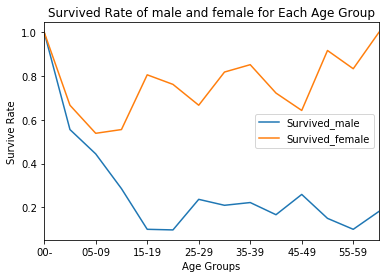

In [110]:
%pylab inline
age_sex_plots = age_sex[['Survived_male', 'Survived_female']].plot(
    kind = 'line', 
    title = 'Survived Rate of male and female for Each Age Group'
    )

plt.xlabel('Age Groups')
plt.ylabel('Survive Rate')

### Limitations

    When analyzing this data, I mainly focused on the factor Age. However, like I indicated at the beginning of this report, there are missing values for this factor. I simply deleted those records from our dataset and based on the remaining data I draw following conclusions, which might be biased. 
    
    There are 891 records in the original dataset and I only look at 714 of them, which only takes 80% of the original dataset so the analysis is not that sufficient and precise if those deleted 177 age records have a totally different survive pattern as what I got here. But also, if those deleted 177 age records and other 714 records are from the same survie pattern, then the conclusion below will be slghtly influenced but the pattern will still be the same.

### Summary

    1. There are 891 records, and  Age and Embarked has some missing values.

    2. By describing the dataset after grouping, we can see that:
        1) The hihger the class, the larger the survive rate.
        2) Female has larger survive rate than that of male.
        3) Average age for surived people are younger than that of died.
        4) Average number of siblings / spouses for surived people are less than that of died.
        5) Average number of parents / children for surived people are larger than that of died.
        5) Passengers embarked at Cherbourg have a higher mean than those of the other two embarkations.

    From this simple description, it seems that passengers who purchased higher class tickets, whose gender is female, whose age is younger, who has less number of siblings / spounses aboard, who has more number of parents / children aboard were more likely to be survived.

    3. After grouped ages into 17 groups, with a bin size of 5, we can see that :
        1) The highest survived rate is around 00-01 years old and 75+ years old, but number of passengers whose ages were in this two groups are really small.
        2) Most of assenger aboard the Titanic had an age among 15-39 years old, but for passengers whose age fell into 15-25 had a higher survive rate than that of passengers whoses age were between 25 and 39.
        3) Survive rates for passengers whose age between 25-64 are close to each other, but still have two peaks locate at age group 35-39 and age group 50-54.

    Although younger passengers are more like to survive, the survive rate various among different age groups, passnegers whose age group is 00-15, 30-39, 50-54 and 75+ are more likely to be survived.

    4. After looking into age group and sex data, it be found that:
        1) Female always have a higher survive rate than males, except the passenger's age is less than 1 years old.
        2) It seems that when Age is older than 9, female survive rate tends to have a positive association with age, while male tends to have a negative association.

    Even female generally has a higher survive rate, it is more likely that a female passanger whose age is among 00-01, 15-19, 30-39, and 50+ to be survived. And for male, even if the average survive rate is significantly low, a male passenger whose age is among 00-14 and 45-49 is more likely to get survived.

### Reference
http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
http://www.python-course.eu/python3_formatted_output.php
https://docs.python.org/3.1/tutorial/inputoutput.html
https://matplotlib.org/devdocs/gallery/api/two_scales.html
https://matplotlib.org/examples/api/two_scales.html
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.assign.html
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html
https://pandas.pydata.org/pandas-docs/stable/merging.html
https://stackoverflow.com/questions/11285613/selecting-columns
https://stackoverflow.com/questions/12555323/adding-new-column-to-existing-dataframe-in-python-pandas
https://stackoverflow.com/questions/14344063/single-legend-for-multiple-axes
https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib
https://stackoverflow.com/questions/14940743/selecting-excluding-sets-of-columns-in-pandas
https://stackoverflow.com/questions/23482201/plot-pandas-dataframe-as-bar-and-line-on-the-same-one-chart
https://stackoverflow.com/questions/31450672/how-to-handle-keyerror-blah-not-in-index
https://stackoverflow.com/questions/36921951/truth-value-of-a-series-is-ambiguous-use-a-empty-a-bool-a-item-a-any-o
https://stackoverflow.com/questions/37999389/invalid-type-comparison-in-the-code
https://stackoverflow.com/questions/40468069/python-pandas-merge-two-dataframes-by-index
https://stackoverflow.com/questions/42593104/convert-list-into-a-pandas-data-frame
https://stackoverflow.com/questions/5317817/python-in-place-functions
https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python